# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [25]:
data = pd.read_csv("weight-height.csv")
male_df = data.loc[data["Gender"] == "Male"]
female_df = data.loc[data["Gender"] == "Female"]

print("Male Height Mean: ", male_df["Height"].mean())
print("Male Height Std: ", male_df["Height"].std())

print("Male Weight Mean: ", male_df["Weight"].mean())
print("Male Weight Std: ", male_df["Weight"].std())

print("Female Height Mean: ", female_df["Height"].mean())
print("Female Height Std: ", female_df["Height"].std())

print("Female Weight Mean: ", female_df["Weight"].mean())
print("Female Weight Std: ", female_df["Weight"].std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height Mean:  69.02634590621741
Male Height Std:  2.863362228660647
Male Weight Mean:  187.0206206581932
Male Weight Std:  19.7811545167638
Female Height Mean:  63.70877360342507
Female Height Std:  2.696284015765054
Female Weight Mean:  135.86009300746835
Female Weight Std:  19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

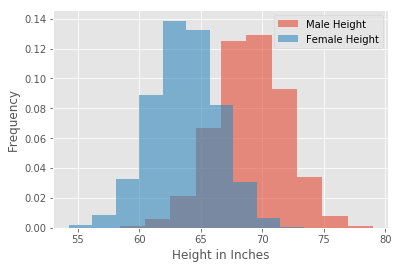

In [27]:
# Your code here
male_df.Height.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Male Height")
female_df.Height.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Female Height");
plt.xlabel("Height in Inches")
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
# Both distributions seem to be normal.
# There are more men than women in the higher Height values. 
# Both women and men share the height range between 65 to 68 inches. 

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

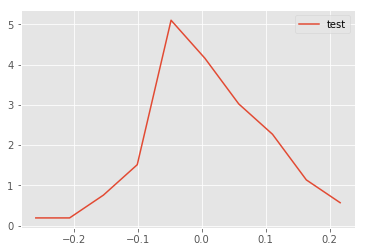

In [30]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k + 1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

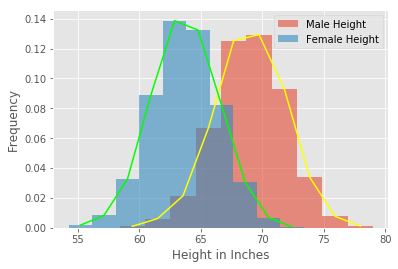

In [34]:
# Your code here 
male_df.Height.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Male Height")
female_df.Height.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Female Height")
x1, y1 = density(male_df.Height)
plt.plot(x1, y1, color= "yellow")
x2, y2 = density(female_df.Height)
plt.plot(x2, y2, color = "lime")
plt.xlabel("Height in Inches")
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

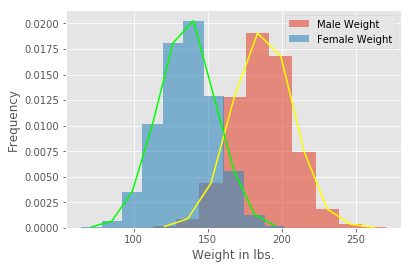

In [35]:
# Your code here 
male_df.Weight.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Male Weight")
female_df.Weight.plot.hist(bins= 10, alpha= 0.6, density= True, label = "Female Weight")
x1, y1 = density(male_df.Weight)
plt.plot(x1, y1, color= "yellow")
x2, y2 = density(female_df.Weight)
plt.plot(x2, y2, color = "lime")
plt.xlabel("Weight in lbs.")
plt.legend()
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# The weight distributions are pretty similar to the height distributions.
# Men are heavier than women
# Both share the common weight of about 160 lbs.

# What is the takeaway when comparing male and female heights and weights?
# Using weight is easier when comparing men and women

## Repeat the above experiments in seaborn and compare with your results

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


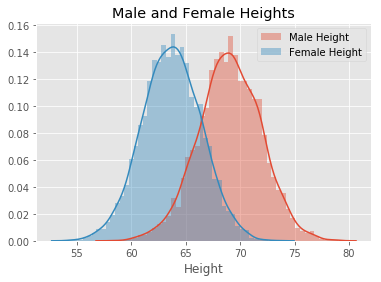

In [38]:
# Code for heights here
sns.distplot(male_df.Height, label= "Male Height")
sns.distplot(female_df.Height, label= "Female Height")
plt.title("Male and Female Heights")
plt.legend()
plt.show()

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


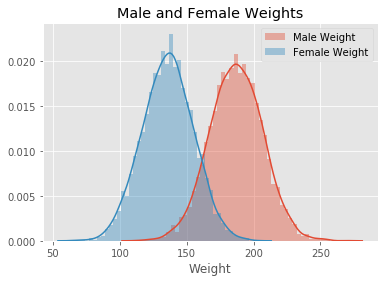

In [39]:
# Code for weights here
sns.distplot(male_df.Weight, label= "Male Weight")
sns.distplot(female_df.Weight, label= "Female Weight")
plt.title("Male and Female Weights")
plt.legend()
plt.show()

In [40]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# Definitely less code with seaborn
# They are very similar, but with seaborn there seems to be no need for setting the alpha in order to see the overlap.
# The bins are less visible in the seaborn approach. 

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.